<a href="https://colab.research.google.com/github/EduardoMCruz/Sprint-IV_MVP/blob/main/Sprint_IV_engenharia_de_software.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qualidade de Software, Segurança e Sistemas Inteligentes
## MVP IV

In [3]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pickle import dump
from pickle import load


## Carga do Dataset

In [5]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/EduardoMCruz/Sprint-IV_MVP/main/Database_Covid/covid_database.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Substitui 'POSITIVO' por 1 e 'NEGATIVO' por 0
dataset = dataset.replace({'POSITIVO': 1, 'NEGATIVO': 0})

# Remove as linhas com valores NaN
dataset = dataset.dropna()

# Mostra as primeiras linhas do dataset
dataset.head()

,idade,rt_pcr,leucocitos,basofilos,creatinina,proteina_c,hemoglobina
0,68,1,15910.0,0.0,0.89,136.0,8.6
1,68,1,19830.0,0.0,0.77,51.0,11.2
3,68,1,13250.0,0.0,0.66,333.0,7.9
4,68,1,15730.0,0.0,0.69,77.0,11.6
5,68,1,14480.0,0.0,0.79,472.0,9.1


## Separação em conjunto de treino e conjunto de teste com holdout

In [6]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values

# Entrada
X = np.hstack((array[:,0:1], array[:,2:7])) # Todas as colunas exceto a segunda
# Saida
y = array[:,1] # Coluna 2
y = y.astype(int)

print("Valores de entrada X:")
print(X)

print("\nValores de saída y:")
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

Valores de entrada X:
[[68 15910.0 0.0 0.89 136.0 8.6]
 [68 19830.0 0.0 0.77 51.0 11.2]
 [68 13250.0 0.0 0.66 333.0 7.9]
 ...
 [62 32290.0 0.0 5.0 87.0 8.9]
 [62 12100.0 0.0 1.11 24.0 10.6]
 [49 19900.0 0.0 0.92 166.0 16.4]]

Valores de saída y:
[1 1 1 ... 1 1 0]


## Modelagem e Inferência
### Criação e avaliação de modelos: linha base

KNN: 0.614542 (0.023048)
CART: 0.793909 (0.015641)
NB: 0.687877 (0.030798)
SVM: 0.659000 (0.000940)


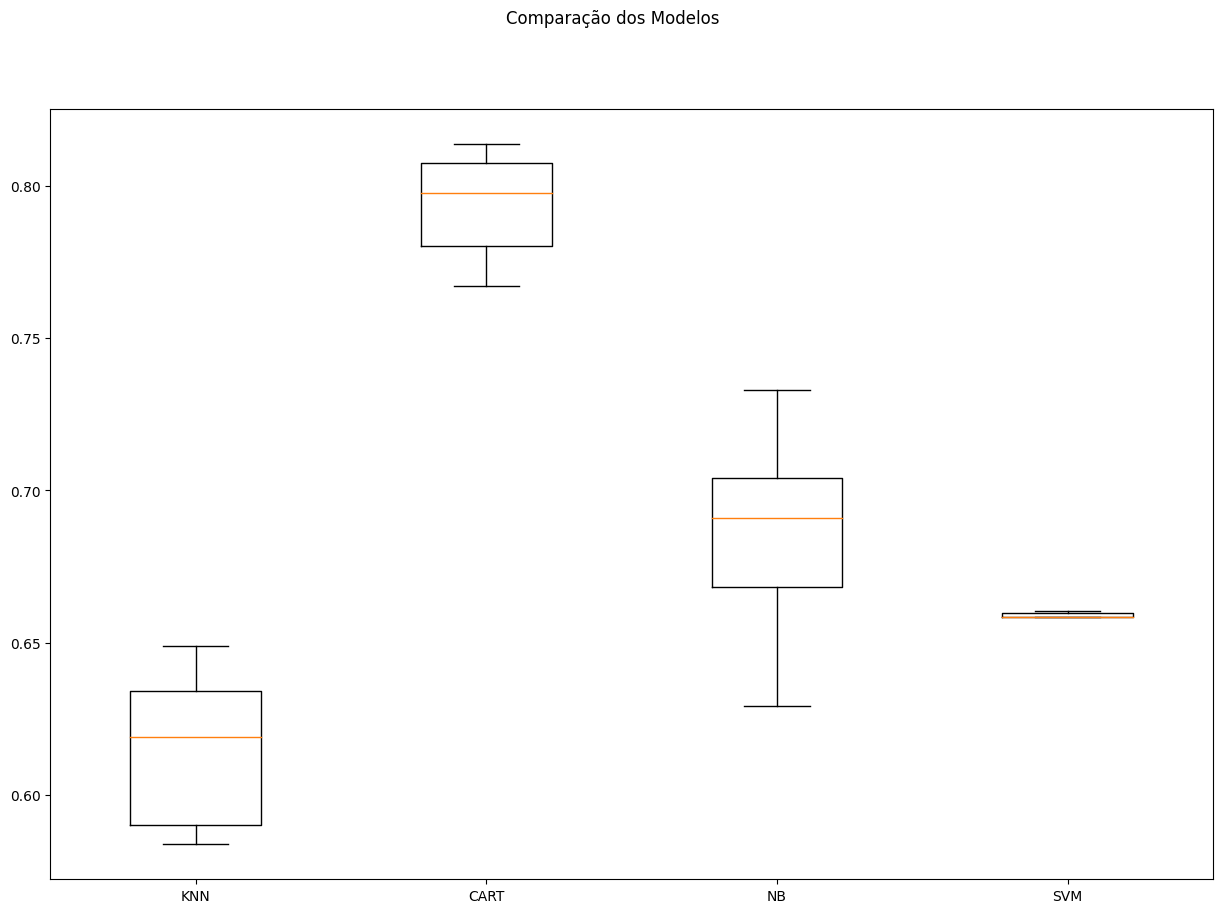

In [7]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.615 (0.023)
CART-orig: 0.794 (0.016)
NB-orig: 0.688 (0.031)
SVM-orig: 0.659 (0.001)
KNN-padr: 0.744 (0.025)
CART-padr: 0.790 (0.013)
NB-padr: 0.684 (0.026)
SVM-padr: 0.716 (0.022)
KNN-norm: 0.747 (0.018)
CART-norm: 0.791 (0.017)
NB-norm: 0.684 (0.026)
SVM-norm: 0.707 (0.018)


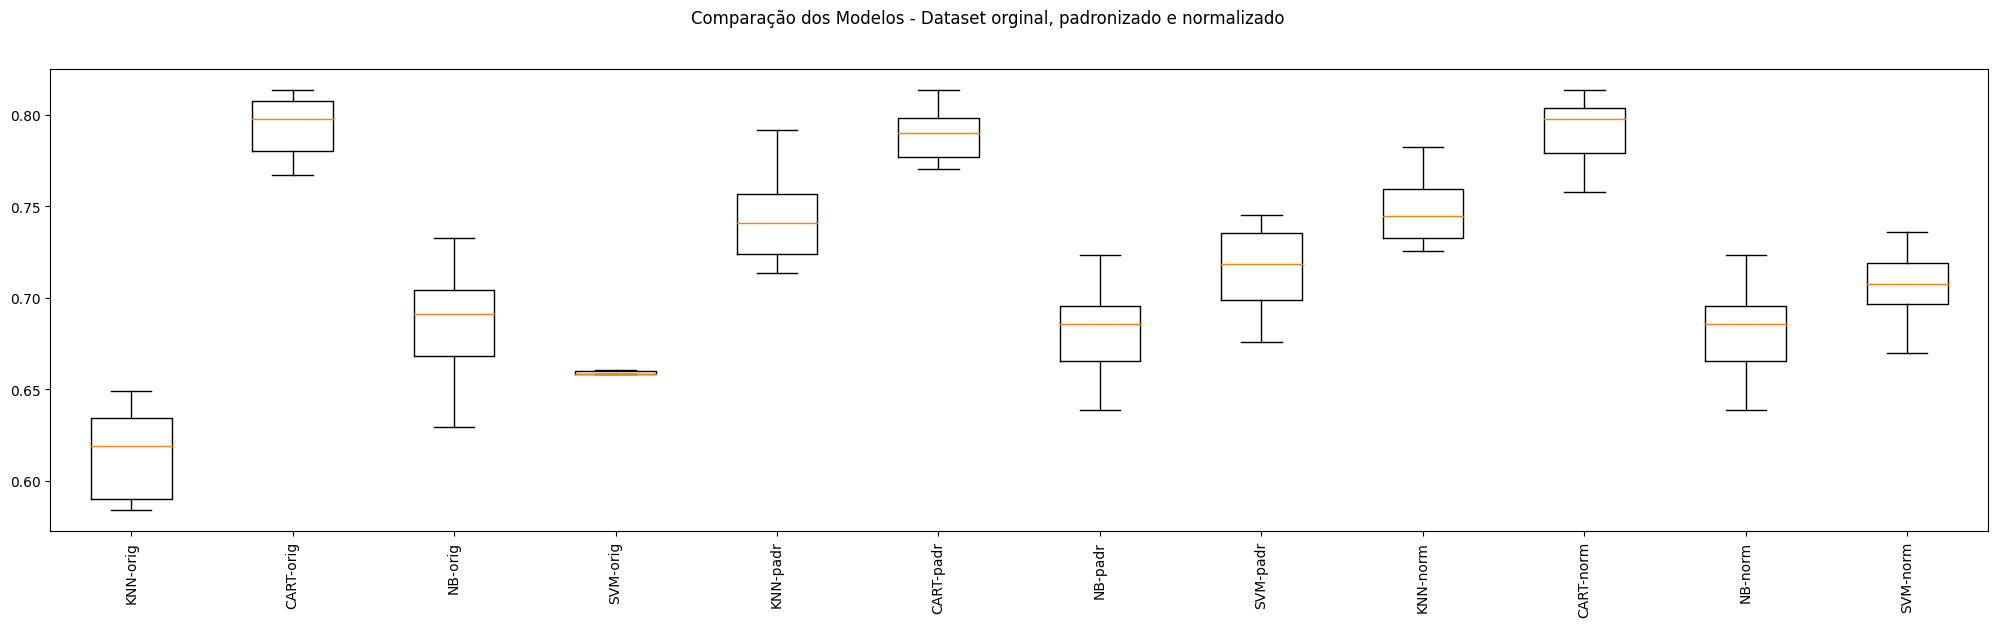

In [8]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizadochrome-extension://mcgbeeipkmelnpldkobichboakdfaeon/images/logo-vertical.svg
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [10]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Modelo: knn-orig - Melhor: 0.646561 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}
Modelo: knn-padr - Melhor: 0.768401 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Modelo: knn-norm - Melhor: 0.773987 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}


## Finalização do Modelo

In [11]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=15)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.7801242236024845


In [12]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

## Simulando a aplicação do modelo em dados não vistos

In [13]:
# Novos dados - não sabemos a classe!

# idade	rt_pcr	leucocitos	basofilos	creatinina	proteina_c	hemoglobina
data = {'idade':  [40, 55, 59],
        'leucocitos': [5000, 6000, 9060],
        'basofilos': [0, 1, 0],
        'creatinina': [0.88, 0.75, 0.86],
        'proteina_c': [141, 263, 45],
        'hemoglobina': [13.4, 14.1, 12.3],
        }

atributos = ['idade', 'leucocitos', 'basofilos', 'creatinina', 'proteina_c', 'hemoglobina']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:6].astype(float)  # Seleciona todas as 7 colunas

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-1.23028298 -1.14586874 -0.42072903 -0.39718337  0.40206536  1.20826311]
 [-0.32644747 -1.00936096  1.67874016 -0.47161833  1.66201236  1.49797295]
 [-0.08542467 -0.59164717 -0.42072903 -0.4086349  -0.58936835  0.75300479]]


In [14]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 1 0]


**Fazendo o download do arquivo KNN pkl**

In [15]:
import pickle
from google.colab import files

# Salvar o modelo usando pickle
with open('covid_knn.pkl', 'wb') as pickle_out:
    pickle.dump(model, pickle_out)

# Baixar o arquivo para o ambiente local
files.download('covid_knn.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Fazendo o download do arquivo joblib**

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Seus dados de treinamento
data = {'idade': [50, 67, 66],
        'leucocitos': [6880, 19830, 8030],
        'basofilos': [0, 0, 1],
        'creatinina': [0.55, 0.61, 0.80],
        'proteina_c': [258, 149, 300],
        'hemoglobina': [10, 9.1, 11.8]
        }

atributos = ['idade', 'leucocitos', 'basofilos', 'creatinina', 'proteina_c', 'hemoglobina']
entrada = pd.DataFrame(data, columns=atributos)

# Extrair as features
newX_train = entrada.values.astype(float)

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados de treinamento e transformar os dados
X_train_scaled = scaler.fit_transform(newX_train)

# Salvar o scaler em um arquivo
dump(scaler, 'scaler.joblib')

# Fazer o download do arquivo
files.download('scaler.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Regressão Linear**

In [23]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pickle import dump
from pickle import load

In [17]:
# Cria o modelo
modelo = LogisticRegression(solver='liblinear')

# Treina o modelo
modelo.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
# Salva o modelo no disco
filename = 'covid_lr.pkl'
dump(modelo, open(filename, 'wb'))

**Carrega o modelo**

In [21]:
# Baixar o arquivo para o ambiente local
files.download('covid_lr.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>